The cosine-map is defined as:

$$\begin{aligned} x_{n+1}= & \frac{r}{4}\left((a+1) \cos \left[k\left(x_n-\frac{1}{2}\right)\right]-a\right), \\ & \text { with } k=2 \arccos \left(\frac{a}{a+1}\right), \quad a>0 .\end{aligned}$$

For $a = 1$ <br>
$$
\begin{aligned}
k&=2 \arccos \left(\frac{1}{2}\right) \\
&=\frac{2\pi}{3} \\
\end{aligned}
$$

Therefore the $a = 1$ cosine-map is defined as:
$$\begin{aligned} x_{n+1}= & \frac{r}{4}\left(2 \cos \left[\frac{2\pi}{3}\left(x_n-\frac{1}{2}\right)\right]-1\right).\end{aligned}$$

Some code for this map:

In [5]:
import random
import math

def cosine_map(x_n,r):
    return (r/4) * (2 * math.cos((2*math.pi/3)*(x_n-0.5)) - 1)

# Initialise x with a random value between 0 and 1
x = random.random()

# Number of iterations
iterations = 50

# Constant in the logistic map equation
r = 4

# Iterate and apply the logistic map formula
for i in range(iterations):
    x = cosine_map(x, r)
    print(f"Iteration {i+1}: x = {x}")

Iteration 1: x = 0.3381050741674103
Iteration 2: x = 0.8861275111947424
Iteration 3: x = 0.3808736841529623
Iteration 4: x = 0.938073203942225
Iteration 5: x = 0.21561711509485204
Iteration 6: x = 0.6556127327292225
Iteration 7: x = 0.8947166156050728
Iteration 8: x = 0.3546254759249745
Iteration 9: x = 0.9080109339251139
Iteration 10: x = 0.31313696650989353
Iteration 11: x = 0.8487784654443351
Iteration 12: x = 0.4897085584818379
Iteration 13: x = 0.9995354282107205
Iteration 14: x = 0.0016848064047303435
Iteration 15: x = 0.006105563208188336
Iteration 16: x = 0.02206617124320487
Iteration 17: x = 0.07895098691644709
Iteration 18: x = 0.2714591964152373
Iteration 19: x = 0.775230666328417
Iteration 20: x = 0.6768147029343894
Iteration 21: x = 0.8644232719945875
Iteration 22: x = 0.44519147710369156
Iteration 23: x = 0.9868375576340886
Iteration 24: x = 0.04736205619567713
Iteration 25: x = 0.16661313781128784
Iteration 26: x = 0.5319447500361238
Iteration 27: x = 0.9955254001061118


Plotting the last 500 $x$ values over 5000 iterations of the Cosine Map with $a=1$ and $r=4$:

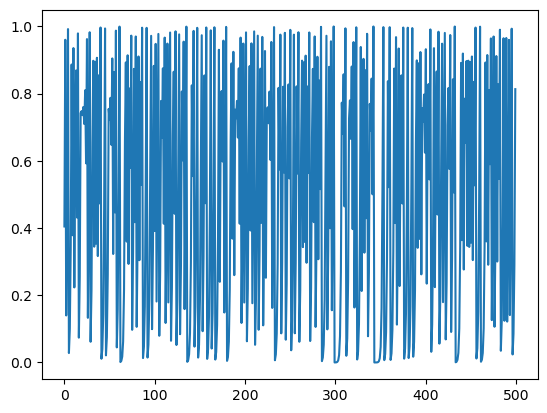

In [36]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Cosine map function with a=1
def cosine_map(x_n,r):
    return (r/4) * (2 * math.cos((2*math.pi/3)*(x_n-0.5)) - 1)

# Number of iterations
iterations = 5000
# Create data structure
x=np.zeros(iterations)
# Initialize x with a random value between 0 and 1
x[0] = random.random()

# Constant in the logistic map equation
r = 4

# Iterate and apply the logistic map formula
for i in range(iterations-1):
    x[i+1] = cosine_map(x[i], r)

# plot the timeseries removing the transient
plt.plot(x[4500:])


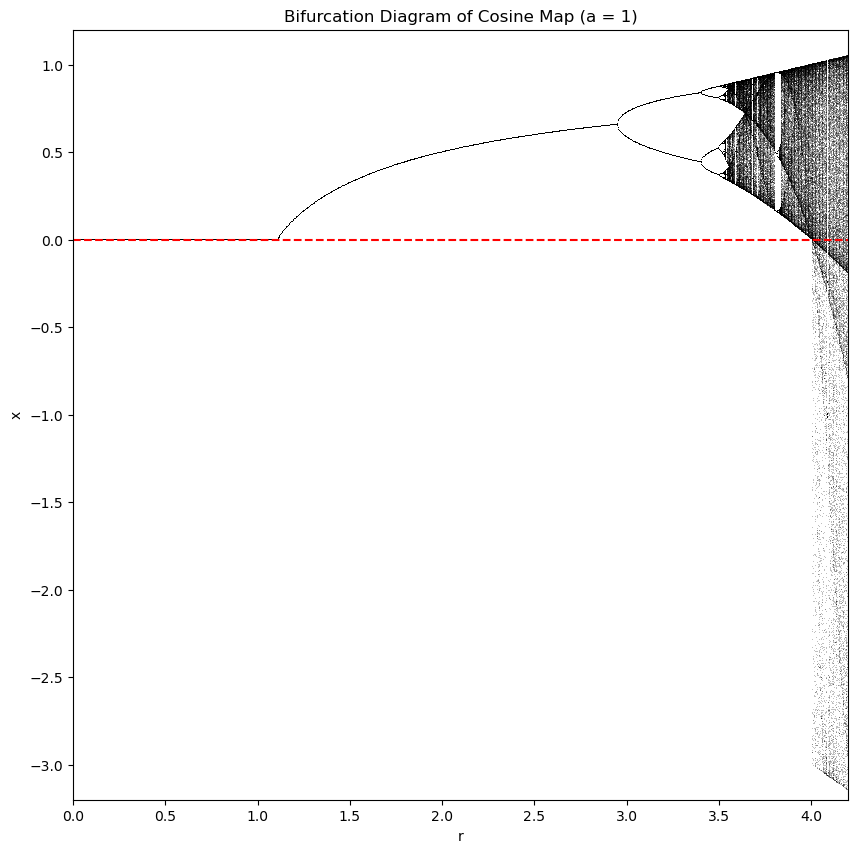

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Cosine map function with a=1
def cosine_map(x, r):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)


# Parameters
r_values = np.linspace(0, 4.2, 1000)  # Range of r values
iterations = 800  # Number of iterations
last_n = 600  # Number of iterations to consider for each r value (disregard first 200 iterations of map)

# Initial conditions
x = 1e-5 * np.ones_like(r_values)

# Iterate the map
for _ in range(iterations):
    x = cosine_map(x, r_values)

# Store the last few iterations for each r
last_values = np.zeros((last_n, len(r_values)))
for i in range(last_n):
    x = cosine_map(x, r_values)
    last_values[i, :] = x

# Transpose last_values for plotting
last_values = last_values.T

# Plotting the bifurcation diagram
plt.figure(figsize=(10, 10))
plt.plot(r_values, last_values, ',k', alpha=0.25)
plt.axhline(0, color='r', linestyle='--')
plt.xlim(0, 4.2)
plt.ylim(-3.2, 1.2)
plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation Diagram of Cosine Map (a = 1)')
plt.show()

The derivative of the  $a = 1$ cosine-map is defined as:

$$ x_{n+1} = -\frac{r\pi}{3} \sin\left(\frac{2\pi}{3}\left(x_n - \frac{1}{2}\right)\right) $$


C:\Users\Steve J\AppData\Local\Temp\ipykernel_32580\1780956531.py:21: RuntimeWarning: divide by zero encountered in log
  sum_lyapunov += np.log(np.abs(cosine_map_derivative(x, r)))


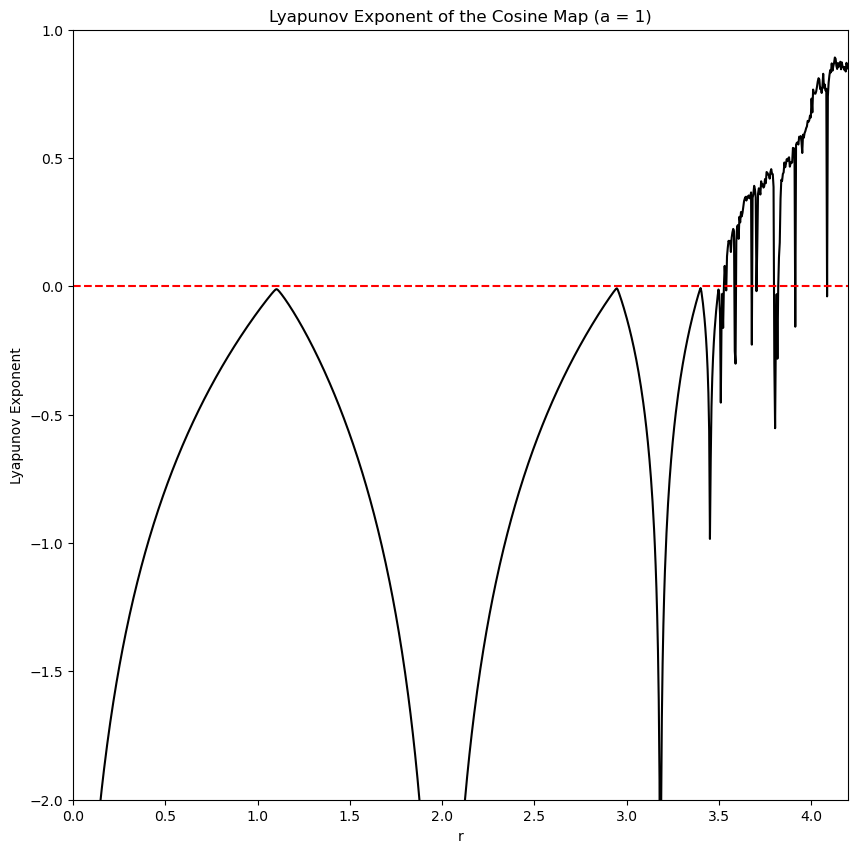

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Cosine map function with a=1
def cosine_map(x, r):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

def cosine_map_derivative(x, r):
    return (-r*np.pi/3) * (np.sin((2*np.pi/3)*(x-0.5)))

# Parameters
r_values = np.linspace(0, 4.2, 1000)  # Range of r values
iterations = 1000  # Number of iterations
lyapunov_exponents = np.zeros_like(r_values)

for i, r in enumerate(r_values):
    x = 0.5  # Initial condition
    sum_lyapunov = 0
    for _ in range(iterations):
        x = cosine_map(x, r)
        sum_lyapunov += np.log(np.abs(cosine_map_derivative(x, r)))
    lyapunov_exponents[i] = sum_lyapunov / iterations

# Plotting the Lyapunov exponent
plt.figure(figsize=(10, 10))
plt.plot(r_values, lyapunov_exponents, '-k')
plt.axhline(0, color='r', linestyle='--')
plt.xlim(0, 4.2)
plt.ylim(-2, 1)
plt.xlabel('r')
plt.ylabel('Lyapunov Exponent')
plt.title('Lyapunov Exponent of the Cosine Map (a = 1)')
plt.show()

# find range where lyapunov exponet is more than 0


Here we can see the Lyapunov Exponent is non-positive for r< X
However there are points for r>x where the lyapunov exponent dips below 0 beifly, meaning the system goes back to predictable behaviour for these r values

In [49]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def draw_cobweb(map_func, x_0, n_iterations, r, a, x_min, x_max):
    x = np.zeros(n_iterations)
    y = np.zeros(n_iterations)
    x_vals = np.linspace(x_min, x_max, int(x_max-x_min) * 100)
    x[0] = x_0

    # Plot the map and identity
    plt.plot(x_vals, x_vals, color='blue', linestyle='--')
    y_vals = map_func(x_vals, r, a)
    plt.plot(x_vals, y_vals, color='blue', label='Map Function')
    plt.xlabel('$x_{n}$')
    plt.ylabel('$x_{n+1}$')
    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)
    plt.title('Cobweb Diagram')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Apply the map iteratively
    line_segments = []
    for i in range(n_iterations - 1):
        y[i] = map_func(x[i], r, a)
        x[i+1] = y[i]
        line_segments.append(([x[i], y[i]], [y[i], y[i]]))
        line_segments.append(([y[i-1], y[i-1]], [y[i-1], y[i]]))

    # Plot all the line segments at once
    for segment in line_segments:
        plt.plot(*segment, color='red', linewidth=0.5)

    plt.plot([x[0], x[0]], [0, x[1]], color='red', linewidth=0.5)

def general_cosine_map(x, r, a):
    return (r/4) * ((a + 1) * np.cos((2*np.arccos(a / (a + 1)))*(x-0.5)) - 1)

def a1_cosine_map(x, r, a=1):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

# Create interactive widgets
x_0_slider = widgets.FloatSlider(value=0.2, min=-1, max=1, step=0.01, description='x_0:')
n_iterations_slider = widgets.IntSlider(value=20, min=1, max=100, step=1, description='n_iterations:')
r_value_slider = widgets.FloatSlider(value=3.5, min=0, max=4, step=0.01, description='r:')
a_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='a:')
x_min_slider = widgets.FloatSlider(value=0, min=-10, max=0, step=0.1, description='x_min:')
x_max_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='x_max:')

# Define the update function
def update_plot(x_0, n_iterations, r, a, x_min, x_max):
    map = a1_cosine_map if a == 1 else general_cosine_map
    draw_cobweb(map, x_0, n_iterations, r, a, x_min, x_max)

# Use the interactive function to tie the update function to the sliders
interactive_plot = widgets.interactive(update_plot, x_0=x_0_slider, n_iterations=n_iterations_slider, r=r_value_slider, a=a_slider, x_min=x_min_slider, x_max=x_max_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=0.2, description='x_0:', max=1.0, min=-1.0, step=0.01), IntSlider(valu…

In [50]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def general_cosine_map(x, r, a):
    return (r / 4) * ((a + 1) * np.cos((2 * np.arccos(a / (a + 1))) * (x - 0.5)) - 1)

def a1_cosine_map(x, r, a=1):
    return (r / 4) * (2 * np.cos((2 * np.pi / 3) * (x - 0.5)) - 1)

def orbit_plot(map_func, n_iterations, r_step, a, x_min, x_max, r_max):
    r_values = np.linspace(0, r_max, int(1/r_step))  # Range of r values
    x = 1e-5 * np.ones_like(r_values)
    x_values = [x]
    n_last = n_iterations - 200

    for _ in range(n_iterations):
        x = map_func(x, r_values, a)
        x_values.append(x)

    last_values = np.zeros((n_last, len(r_values)))

    for i in range(n_last):
        x = map_func(x, r_values, a)
        last_values[i, :] = x

    plt.figure(figsize=(20, 10))
    for i in range(n_last):
        plt.plot(r_values, last_values[i, :], ',k', alpha=500*r_step)
    plt.axhline(0, color='b', linestyle='--')
    plt.xlim(0, r_max)
    plt.ylim(x_min, x_max)
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title('Orbit Diagram of Cosine Map')
    plt.show()

# Create interactive widgets
x_0_slider = widgets.FloatSlider(value=0.2, min=-1, max=1, step=0.01, description='x_0:')
n_iterations_slider = widgets.IntSlider(value=800, min=1, max=2000, step=1, description='n_iterations:')
r_step_slider = widgets.FloatLogSlider(value=0.0001, min=-4, max=-3, step=0.01, description='r_step:')
a_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='a:')
x_min_slider = widgets.FloatSlider(value=0, min=-7.8, max=0, step=0.1, description='x_min:')
x_max_slider = widgets.FloatSlider(value=1, min=0, max=2.6, step=0.1, description='x_max:')
r_max_slider = widgets.FloatSlider(value=4.2, min=0, max=10, step=0.1, description='r_max:')

# Define the update function
def update_plot(n_iterations, r_step, a, x_min, x_max, r_max):
    map_func = a1_cosine_map if a == 1 else general_cosine_map
    orbit_plot(map_func, n_iterations, r_step, a, x_min, x_max, r_max)

# Use the interactive function to tie the update function to the sliders
interactive_plot = widgets.interactive(update_plot, n_iterations=n_iterations_slider, r_step=r_step_slider, a=a_slider, x_min=x_min_slider, x_max=x_max_slider, r_max=r_max_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=800, description='n_iterations:', max=2000, min=1), FloatLogSlider(value…